In [1]:
%load_ext jupyter_probcomp.magics

session_id: jovyan@c685edc6234a_2020-05-04T01:24:54.906689_D


In [2]:
%matplotlib inline
%vizgpm inline

<IPython.core.display.Javascript object>

In [3]:
!rm -f bdb-files/expression-400x4-juliust.bdb

In [4]:
%bayesdb bdb-files/expression-400x4-juliust.bdb

u'Loaded: bdb-files/expression-400x4-juliust.bdb'

In [5]:
import pandas as pd

In [6]:
full_data = pd.read_csv("/home/jovyan/21521940")

In [7]:
full_data.shape

(1270, 19145)

In [8]:
full_data.ix[:5, :10]

,Unnamed: 0,TSPAN6 (7105),TNMD (64102),DPM1 (8813),SCYL3 (57147),C1orf112 (55732),FGR (2268),CFH (3075),FUCA2 (2519),GCLC (2729)
0,ACH-001097,0.000000,0.0,4.667324,1.761285,3.554589,4.358959,0.641546,2.201634,1.941106
1,ACH-001636,0.000000,0.0,6.198887,2.032101,3.755956,2.601697,0.000000,0.000000,3.415488
2,ACH-001804,4.934988,0.0,6.635464,1.929791,2.503349,0.000000,4.883621,6.772546,3.889474
3,ACH-000534,0.839960,0.0,5.376082,2.687061,4.440288,4.938286,0.536053,3.584963,2.935460
4,ACH-000742,3.722466,0.0,6.029674,2.192194,2.533563,0.150560,5.933809,6.973382,5.192194
5,ACH-000836,4.632268,0.0,6.704180,2.792855,4.079805,0.097611,1.150560,5.729553,4.802193


In [9]:
full_data.rename(columns=lambda col: col.split()[0], inplace=True)

In [10]:
full_data.ix[:5, :10]

,Unnamed:,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC
0,ACH-001097,0.000000,0.0,4.667324,1.761285,3.554589,4.358959,0.641546,2.201634,1.941106
1,ACH-001636,0.000000,0.0,6.198887,2.032101,3.755956,2.601697,0.000000,0.000000,3.415488
2,ACH-001804,4.934988,0.0,6.635464,1.929791,2.503349,0.000000,4.883621,6.772546,3.889474
3,ACH-000534,0.839960,0.0,5.376082,2.687061,4.440288,4.938286,0.536053,3.584963,2.935460
4,ACH-000742,3.722466,0.0,6.029674,2.192194,2.533563,0.150560,5.933809,6.973382,5.192194
5,ACH-000836,4.632268,0.0,6.704180,2.792855,4.079805,0.097611,1.150560,5.729553,4.802193


In [11]:
import numpy as np
np.random.seed(420)

In [12]:
rows = np.random.choice(full_data.shape[0], 400, replace=False)
print(rows)

[ 101 1177  208  574 1053  384   48  436   85  947  630  563  652   43 1041
  657  636  307   45  844  561  214  712  402   35  982  556  355  464  594
 1067 1139  658   61 1199  341  573  452  942 1094 1237  725  644 1141 1025
  706 1201  159  730  878  674   17  697  109  729 1114  234  305  939  474
 1218  637  547  353 1026  283 1071   37  851  244  773  784  175  524 1190
  285 1261 1216  560  149  834  236  352  490  849  845  411  981  835 1233
  486  931  421  418 1057  160 1047  423 1135 1197  677 1208  507  145  461
  111  202 1015  654  193   82   75  879  393  382 1194  264 1210  295  511
 1157  129  780   22  222  693 1198  255 1245 1013   77  225  346  785  944
  781  887  566 1066  737 1055  329  131   36  951  292  185  276  420 1002
  871   16  641  769  617  498  144  714  405  676  648  564  888  902  645
 1010  809  670  620 1243  855  967  337  252 1028 1083 1110  506  933 1246
 1165  530 1155  597  818  576  854  764  351  895  985  401  291  164  812
  948  350 1

In [13]:
data = full_data[['POM121', 'POM121C', 'SPIN2A', 'SPIN2B']].ix[rows, :]

In [14]:
data.shape

(400, 4)

In [15]:
data.columns

Index([u'POM121', u'POM121C', u'SPIN2A', u'SPIN2B'], dtype='object')

In [16]:
data.head()

,POM121,POM121C,SPIN2A,SPIN2B
101,3.760221,3.753818,0.344828,3.155425
1177,6.147307,5.821455,0.464668,2.809414
208,3.541019,3.972693,0.400538,4.477030
574,5.116448,5.081510,0.422233,3.215679
1053,3.917432,3.810443,0.933573,4.187451


In [17]:
data.to_csv('Expression-400x4.csv', index=False)

In [18]:
%bql DROP TABLE IF EXISTS "data"

""


In [19]:
%bql CREATE TABLE "data" FROM 'Expression-400x4.csv'

""


In [20]:
%bql .nullify data ''

Nullified 0 cells


In [21]:
%bql SELECT * FROM "data" LIMIT 5;

,POM121,POM121C,SPIN2A,SPIN2B
0,3.760221,3.753818,0.344828,3.155425
1,6.147307,5.821455,0.464668,2.809414
2,3.541019,3.972693,0.400538,4.477030
3,5.116448,5.081510,0.422233,3.215679
4,3.917432,3.810443,0.933573,4.187451


In [22]:
%bql SELECT COUNT(*) FROM "data";

,"""COUNT""(*)"
0,400.0


In [23]:
%mml GUESS SCHEMA FOR "data"

,column,stattype,num_distinct,reason
0,POM121,numerical,373.0,There are at least 20 unique numerical values...
1,POM121C,numerical,386.0,There are at least 20 unique numerical values...
2,SPIN2A,numerical,109.0,There are at least 20 unique numerical values...
3,SPIN2B,numerical,347.0,There are at least 20 unique numerical values...


In [24]:
%%mml
CREATE POPULATION FOR "data" WITH SCHEMA (
    -- Use the guesses from the previous cell for all variables.
    GUESS STATTYPES OF (*);
);

""


### Caveat: replace `SELECT *` by `SELECT col1, col2, col2 ...`  

In [25]:
%bql .interactive_pairplot --population=data SELECT * FROM data

<IPython.core.display.Javascript object>

In [26]:
%mml CREATE GENERATOR FOR "data";

""


In [27]:
%multiprocess on

Multiprocessing turned on from off.


In [28]:
%mml INITIALIZE 16 MODELS IF NOT EXISTS FOR "data";

""


In [29]:
%mml ANALYZE "data" FOR 5 MINUTES

Completed: 113 iterations in 300.067010 seconds.
Completed: 141 iterations in 300.108640 seconds.
Completed: 123 iterations in 300.182363 seconds.
Completed: 92 iterations in 300.383335 seconds.
Completed: 130 iterations in 300.384763 seconds.
Completed: 118 iterations in 300.394666 seconds.
Completed: 124 iterations in 300.422175 seconds.
Completed: 144 iterations in 300.436770 seconds.
Completed: 114 iterations in 300.501021 seconds.
Completed: 161 iterations in 300.884603 seconds.
Completed: 108 iterations in 300.978974 seconds.
Completed: 126 iterations in 301.018729 seconds.
Completed: 118 iterations in 301.161653 seconds.
Completed: 121 iterations in 301.201114 seconds.
Completed: 118 iterations in 301.246582 seconds.
Completed: 70 iterations in 302.471751 seconds.


""


In [33]:
%mml ANALYZE "data" FOR 5 MINUTES

Completed: 127 iterations in 300.043398 seconds.
Completed: 94 iterations in 300.066628 seconds.
Completed: 133 iterations in 300.088544 seconds.
Completed: 113 iterations in 300.149834 seconds.
Completed: 98 iterations in 300.151335 seconds.
Completed: 127 iterations in 300.339388 seconds.
Completed: 98 iterations in 300.371096 seconds.
Completed: 120 iterations in 300.364138 seconds.
Completed: 133 iterations in 300.425028 seconds.
Completed: 92 iterations in 300.461082 seconds.
Completed: 128 iterations in 300.653830 seconds.
Completed: 92 iterations in 300.911762 seconds.
Completed: 105 iterations in 300.937115 seconds.
Completed: 96 iterations in 300.988232 seconds.
Completed: 80 iterations in 301.161418 seconds.
Completed: 63 iterations in 302.461629 seconds.


""


In [ ]:
%mml ANALYZE "data" FOR 5 MINUTES

[============================  ] 94.34%

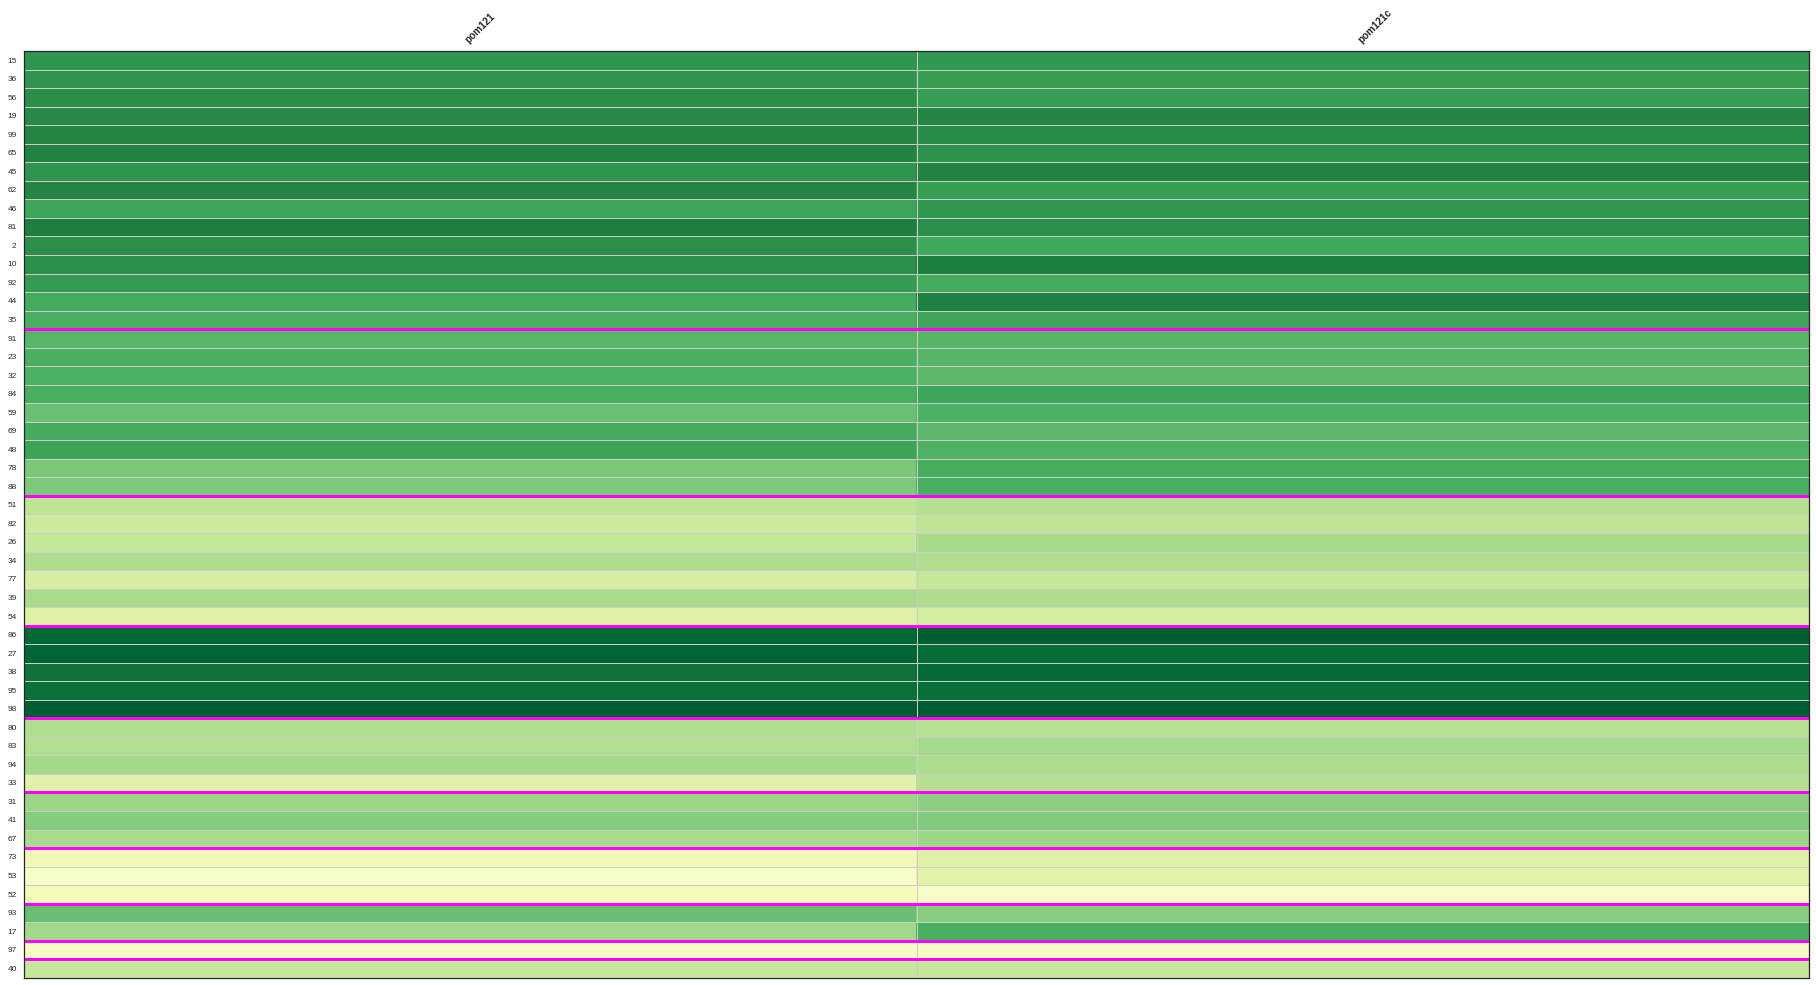

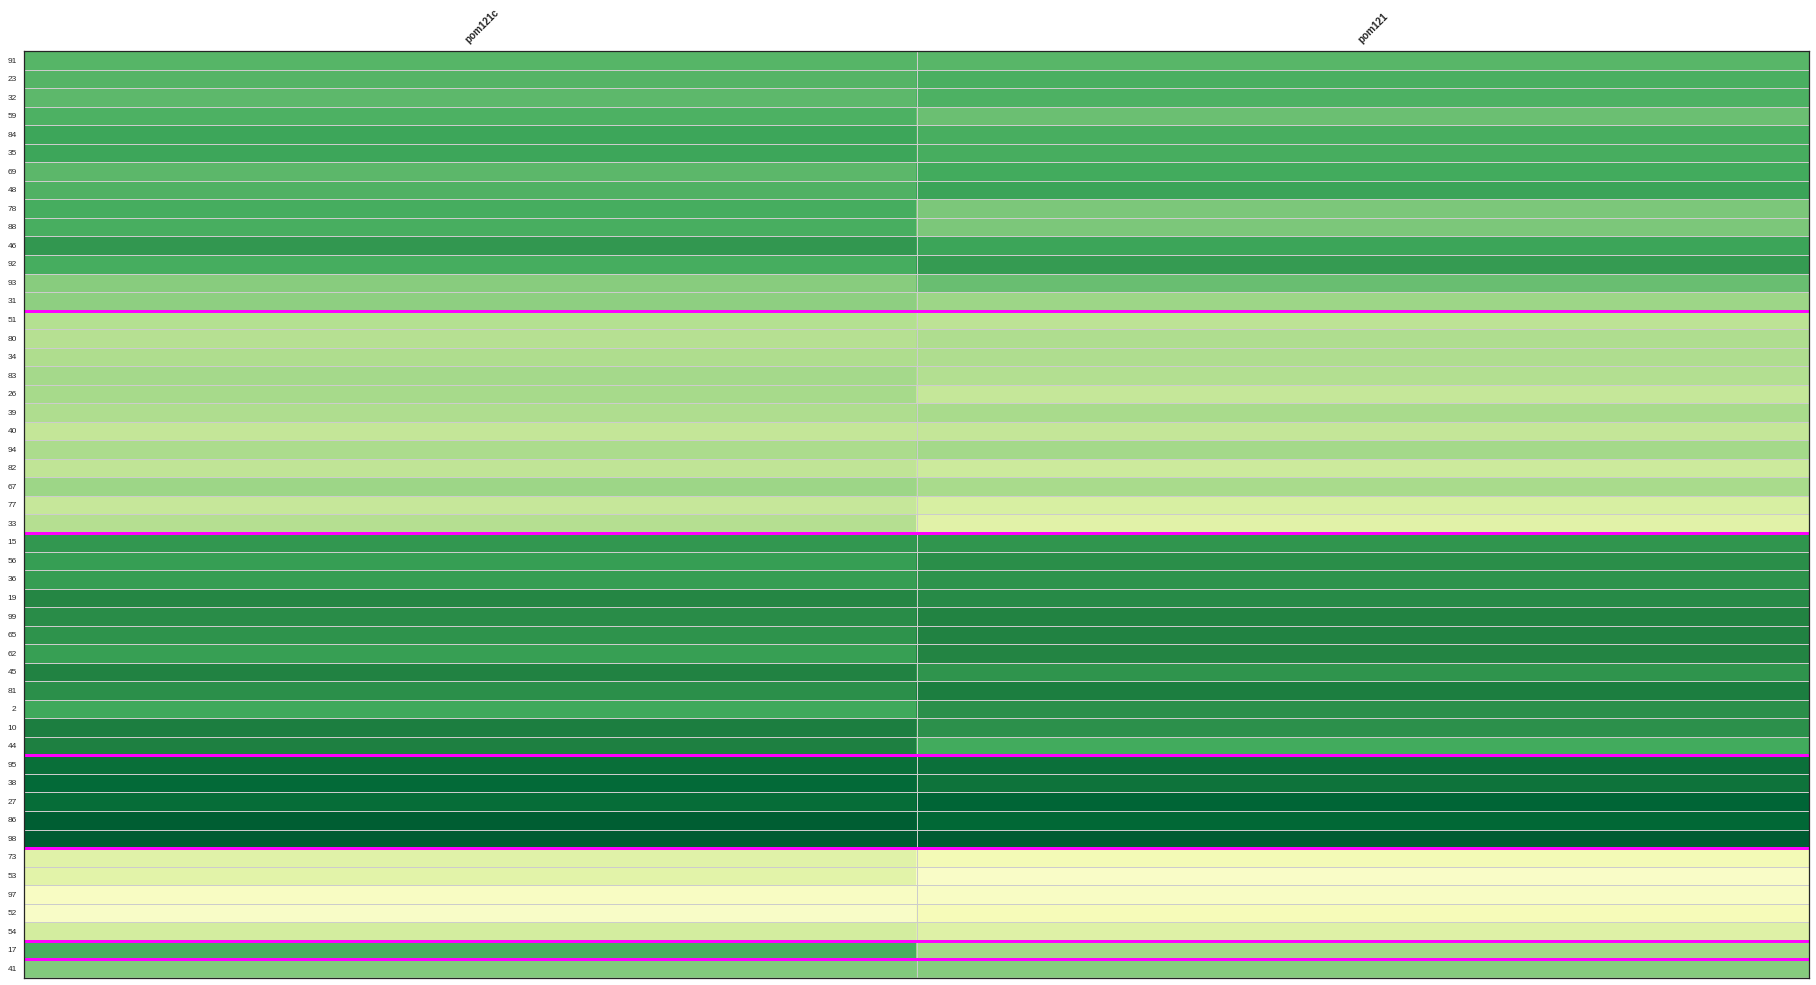

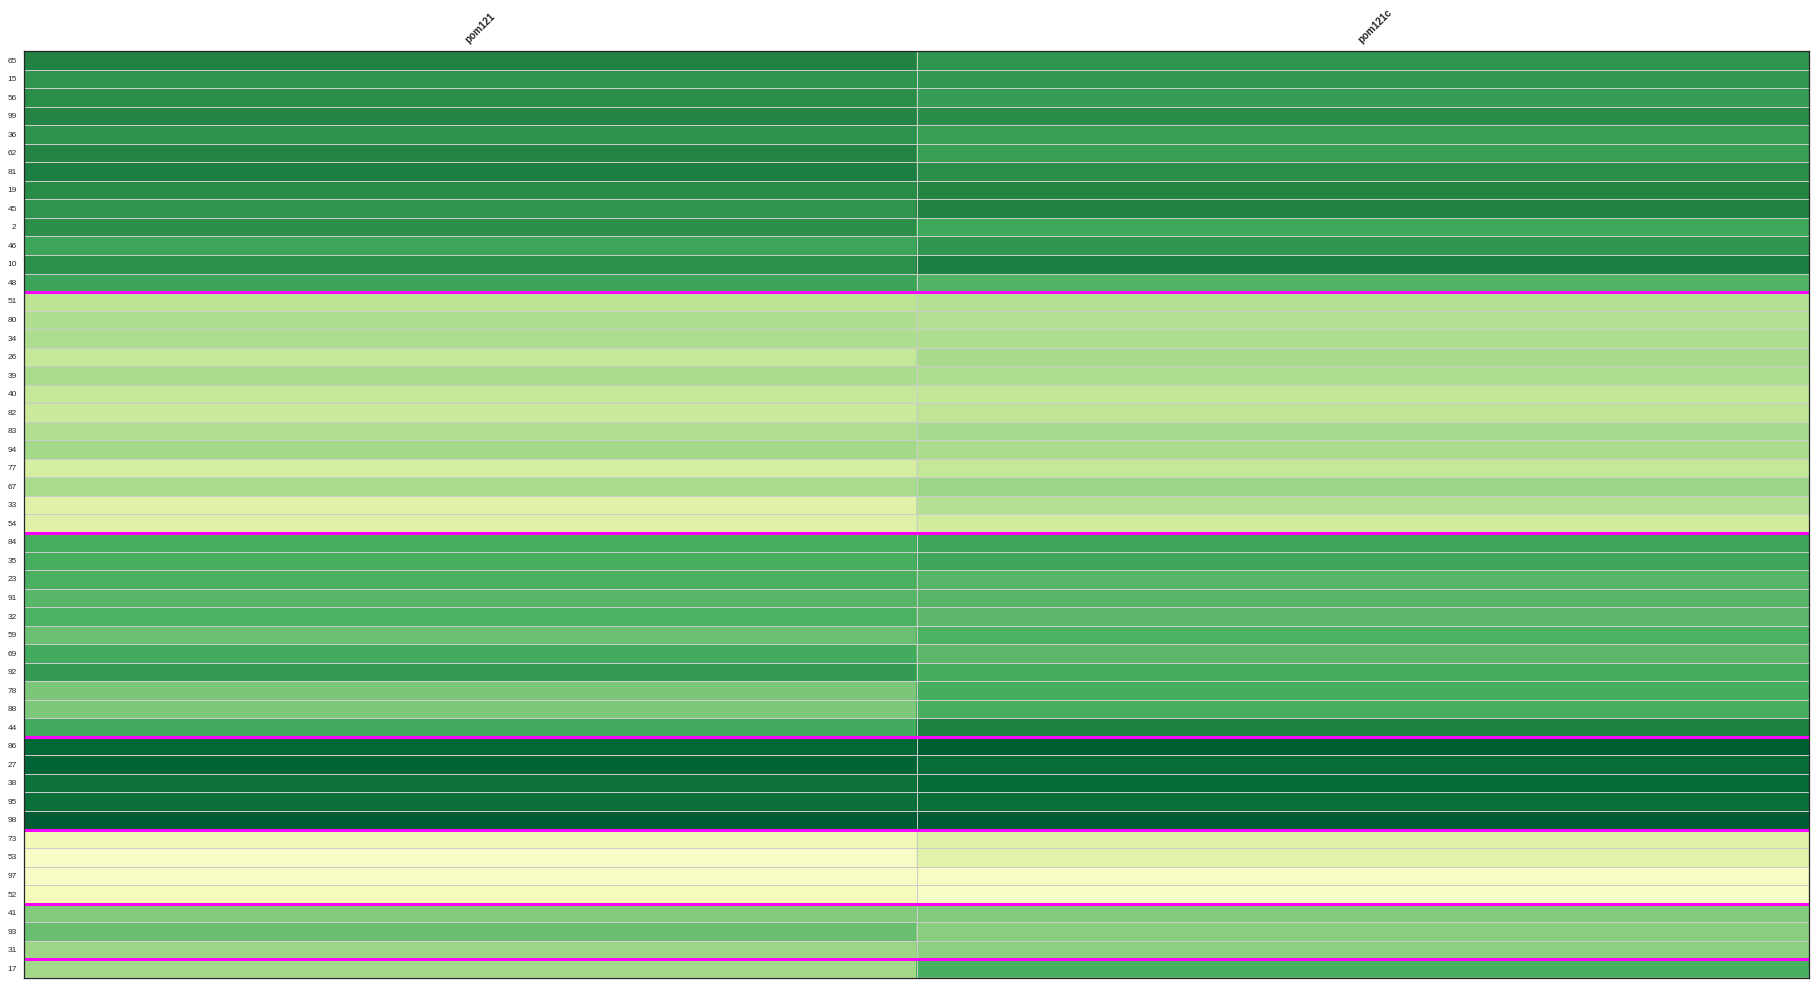

In [19]:
%mml .render_crosscat \
    --subsample=50  --xticklabelsize=small --yticklabelsize=x-small data 0
%mml .render_crosscat \
    --subsample=50  --xticklabelsize=small --yticklabelsize=x-small data 1
%mml .render_crosscat \
    --subsample=50  --xticklabelsize=small --yticklabelsize=x-small data 2

In [20]:
%%bql
DROP TABLE IF EXISTS "correlations";
CREATE TABLE "correlations" AS
ESTIMATE
    CORRELATION AS "correlation",
    CORRELATION PVALUE AS "pvalue"
FROM PAIRWISE VARIABLES OF "data"

""


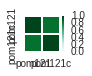

In [21]:
%bql .heatmap SELECT name0, name1, "correlation" FROM "correlations" 

In [22]:
%%bql
DROP TABLE IF EXISTS dependencies;
CREATE TABLE dependencies AS
ESTIMATE
    DEPENDENCE PROBABILITY AS "depprob"
FROM PAIRWISE VARIABLES OF data;

""


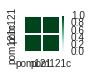

In [23]:
%bql .heatmap SELECT name0, name1, depprob FROM dependencies;

In [24]:
%bql SELECT DISTINCT(name0) FROM dependencies;

,name0
0,pom121
1,pom121c


In [30]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
import simplejson

data = %bql SELECT * FROM "data"
genes = [c for c in data.columns if c !='part']

def get_limits(vals):
    return np.min(vals), np.max(vals)

def plot_simulated_data(x, y, xlim=None, ylim=None):
    """Plot simulated pairwise data against observed data."""
    df_select = %bql SELECT  "{x}", "{y}"  FROM "data"
    N = len(df_select)
    df_sim = %bql SIMULATE  "{x}", "{y}"  FROM "data" LIMIT {N}
    fig, ax = plt.subplots()
    alpha = 0.9
    size=2
    ax.scatter(df_sim[x].values, df_sim[y].values, color='darkblue', alpha=alpha, s=size)
    ax.scatter(df_select[x].values, df_select[y].values, color='red', alpha=alpha, s=size)
    ax.scatter([], [], color='darkblue', label='SIMULATEd data')
    ax.scatter([], [], color='red', label= 'SELECTed data')
    ax.set_xlim(get_limits(df_select[x].values))
    ax.set_ylim(get_limits(df_select[y].values))
    ax.legend()
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title('SELECT vs SIMULATE')
    ax.grid(True)
    fig.set_size_inches(8, 6)
    plt.tight_layout()
    return fig, ax

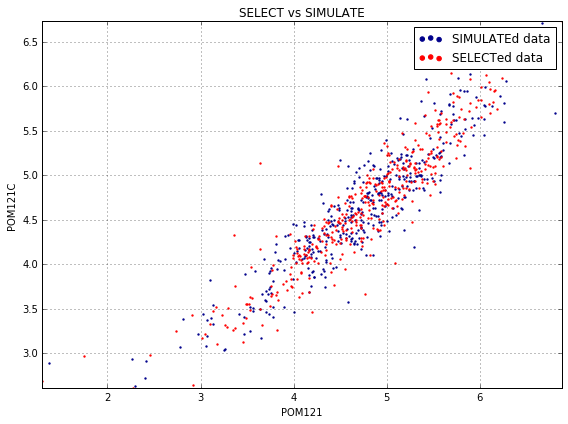

In [31]:
fig, ax = plot_simulated_data("POM121", "POM121C")

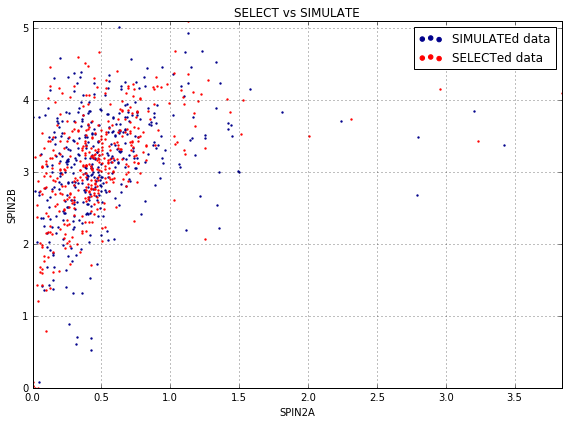

In [32]:
fig, ax = plot_simulated_data("SPIN2A", "SPIN2B")

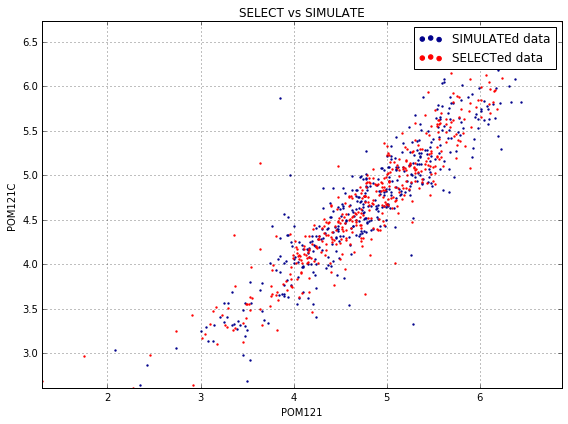

In [34]:
fig, ax = plot_simulated_data("POM121", "POM121C")

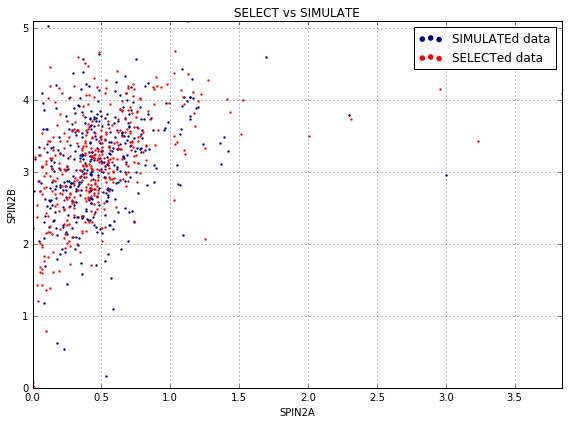

In [35]:
fig, ax = plot_simulated_data("SPIN2A", "SPIN2B")

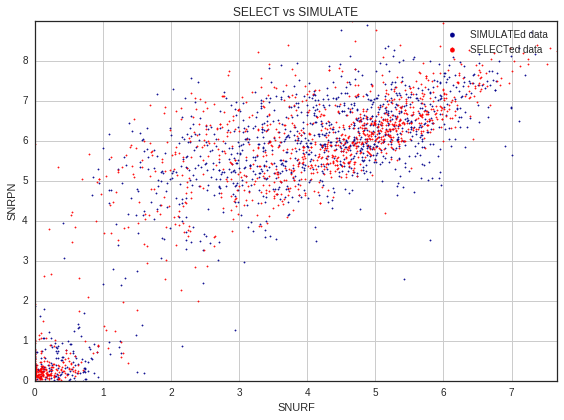

In [46]:
fig, ax = plot_simulated_data("SNURF", "SNRPN")

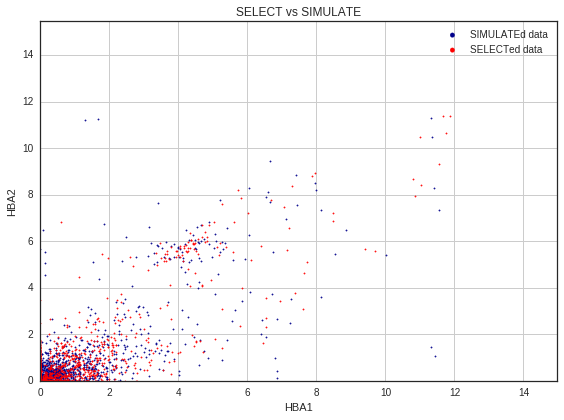

In [47]:
fig, ax = plot_simulated_data("HBA1", "HBA2")

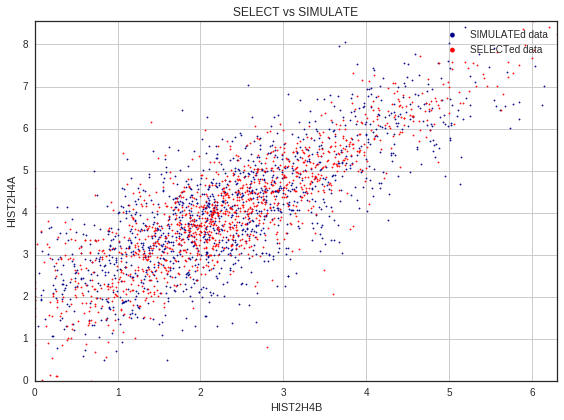

In [48]:
fig, ax = plot_simulated_data("HIST2H4B", "HIST2H4A")

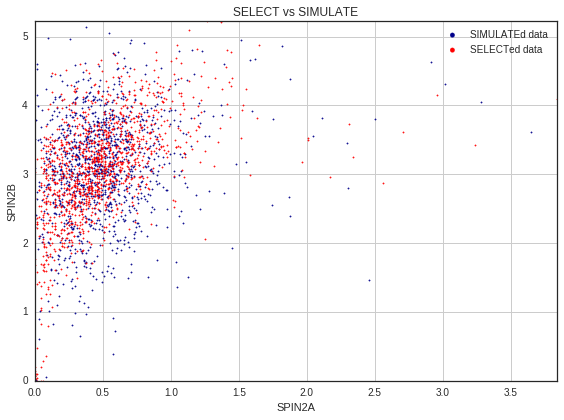

In [49]:
fig, ax = plot_simulated_data("SPIN2A", "SPIN2B")

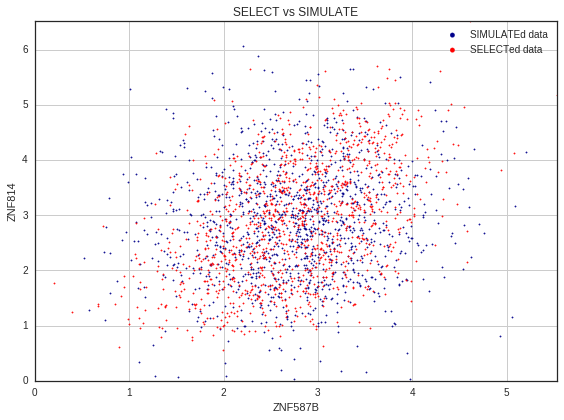

In [50]:
fig, ax = plot_simulated_data("ZNF587B", "ZNF814")

In [51]:
np.random.seed(42)

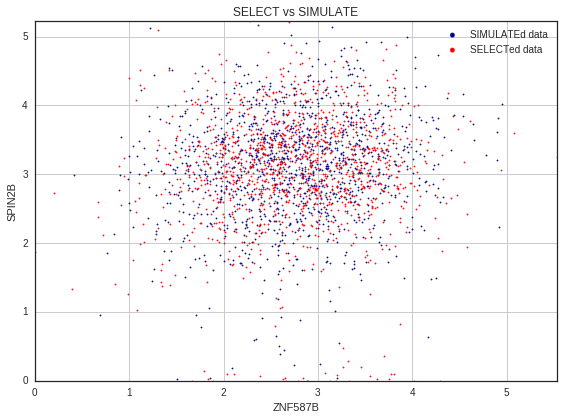

In [52]:
g1, g2 = np.random.choice(genes, 2, replace=False)
fig, ax = plot_simulated_data(g1, g2)

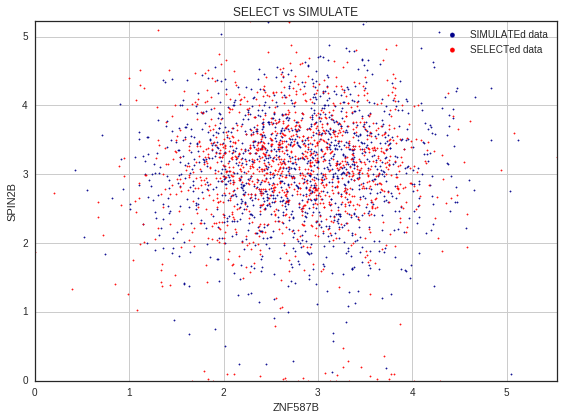

In [53]:
g1, g2 = np.random.choice(genes, 2, replace=False)
fig, ax = plot_simulated_data(g1, g2)

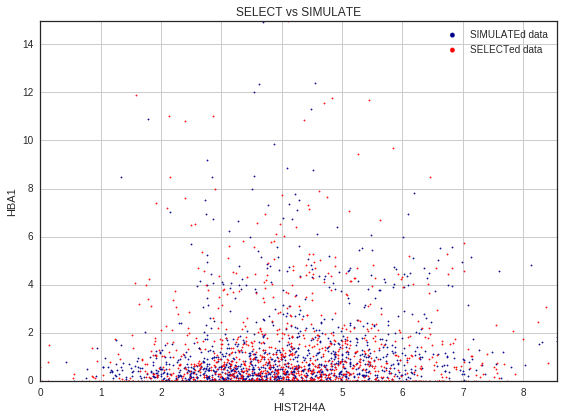

In [54]:
g1, g2 = np.random.choice(genes, 2, replace=False)
fig, ax = plot_simulated_data(g1, g2)

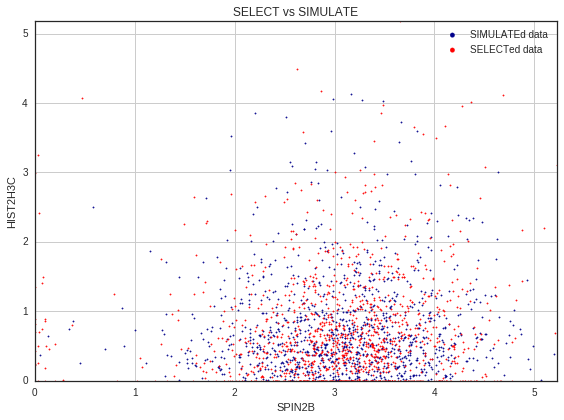

In [55]:
g1, g2 = np.random.choice(genes, 2, replace=False)
fig, ax = plot_simulated_data(g1, g2)

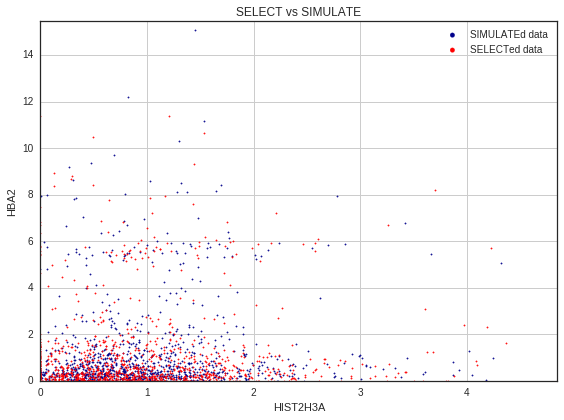

In [56]:
g1, g2 = np.random.choice(genes, 2, replace=False)
fig, ax = plot_simulated_data(g1, g2)

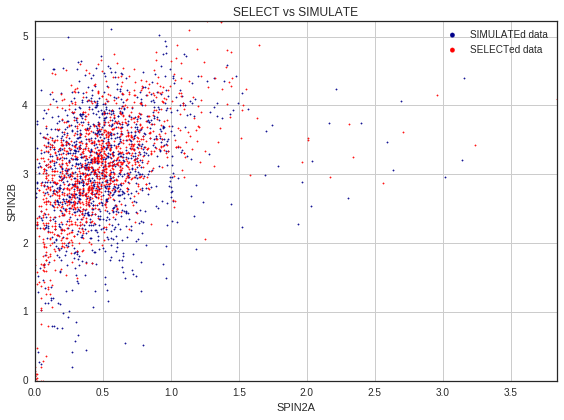

In [57]:
g1, g2 = np.random.choice(genes, 2, replace=False)
fig, ax = plot_simulated_data(g1, g2)

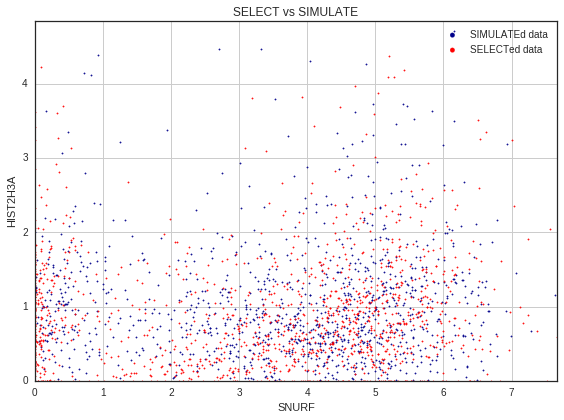

In [58]:
g1, g2 = np.random.choice(genes, 2, replace=False)
fig, ax = plot_simulated_data(g1, g2)

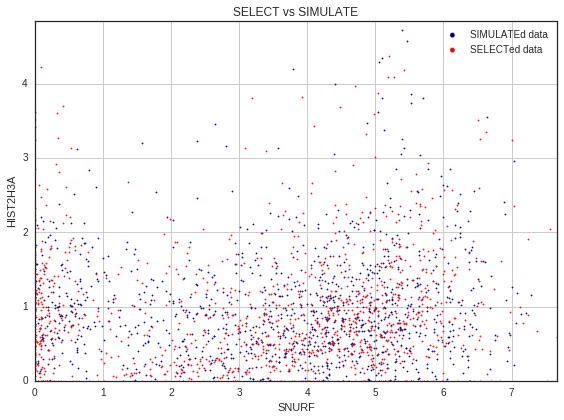

In [59]:
g1, g2 = np.random.choice(genes, 2, replace=False)
fig, ax = plot_simulated_data(g1, g2)

In [40]:
conditional_mi_str = '''
SIMULATE
    MUTUAL INFORMATION OF {g1} WITH {g2} GIVEN (part='{part}') USING 100 SAMPLES
        AS "mi"
FROM MODELS OF "data"
'''

In [41]:
print conditional_mi_str.format(g1='rseb', g2='fabi', part='True')


SIMULATE
    MUTUAL INFORMATION OF A1BG WITH A2ML1 USING 100 SAMPLES
        AS "mi"
FROM MODELS OF "data"



In [42]:
%bql {conditional_mi_str.format(g1='rseb', g2='fabi', part='True')}

,mi
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,-0.007631


In [43]:
pairwise = list(itertools.combinations(genes, 2))

In [41]:
def get_mi(g1, g2, condition):
    bql_query = conditional_mi_str.format(g1=g1, g2=g2, part=condition)
    # print bql_query
    df = %bql {bql_query}
    return df.mi.values

In [42]:
def linfoot_transform(mi):
    return np.sqrt(1 - np.exp(- 2 * mi))

In [43]:
total = len(pairwise)

In [44]:
def pair_to_name(c1, c2):
    return c1 + '--' + c2

In [45]:
def compute_dep_results(condition):
    results = {}
    print '==== Conditon: ' + condition + ' ===='
    for i, pair in enumerate(pairwise):
        c1 = pair[0]
        c2 = pair[1]
        main_key = pair_to_name(c1, c2).lower()
        results[main_key] = {}
        mi_vals = get_mi(c1, c2, condition)
        mi_vals[mi_vals < 0] = 0 # We're doing Monte Carlo approximations which can be < 0.
        results[main_key]['ri'] = linfoot_transform(mi_vals).tolist()
        if ((i+1) % 10) == 0:
            print 'Computed {} out of {} pairwise relationships'.format(i+1, len(pairwise))
    print ''
    return results

In [46]:
conditions = ['True', 'False']

In [48]:
results = {'mi':{}}
for condition in conditions:
    results['mi'][condition] = compute_dep_results(condition)
path = 'cmi-results/results-Bridge-demo-Arac-part.json'
print path
with open(path, 'w') as outfile:  
    outfile.write(simplejson.dumps(results, ignore_nan=True))

==== Conditon: True ====
Computed 10 out of 10 pairwise relationships

==== Conditon: False ====
Computed 10 out of 10 pairwise relationships

cmi-results/results-Bridge-demo-Arac-part.json
